In [5]:
import pandas as pd
import numpy as np

In [16]:
black_box = pd.read_csv('data/black_box.csv',sep=None)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [270]:
black_box.tail()

brand      title                                            content
2164  팅크웨어/아이나비  [2채널LCD무]  아침출근길에 재부팅 2번이나뜨네요....오히려 업그레이드전이 쫌덜한거같았는데...아...
2165  팅크웨어/아이나비  [2채널LCD무]  어제 집앞에 차를 대놓고 집에있다가 나왔는데\n차 오른쪽 앞바퀴 쪽에 검게 쫙 글어...
2166  팅크웨어/아이나비  [2채널LCD무]  FXD 900 오늘 혼자서 설치해봤는데요\n 접지를 잘못 연결하는 바람에 한참 고민...
2167  팅크웨어/아이나비      [1채널]  안녕하세요.\n 아이나비 블랙클레어 1 , 몇 년 잘 사용하고 있는 사람입니다.\n...
2168  팅크웨어/아이나비  [2채널LCD무]  유라이브 알바트로스2를 구입해서 불량이 생겨 fxd900마하로 교환하여 쓰고 있습니...

## 0. 데이터 프레임 나누기

In [95]:
itro = black_box[:440]

In [100]:
cnc = black_box[440:880]

In [112]:
fine = black_box[880:1320]

In [116]:
qr = black_box[1320:1749]

In [119]:
inavi = black_box[1749:]

In [122]:
brand_list  = ['itro', 'cnc' , 'fine' , 'qr', 'inavi']

In [271]:
black_box2 = black_box.dropna(axis=0, how='any')
len(black_box2)

2122

## 1.content 가 null 인 경우 처리 ( 동영상만 있었거나 사진만 올린경우 )

In [123]:
def null_ck(df):
    print (df.isnull().sum())
    

In [124]:
null_ck(itro)

brand      0
title      0
content    0
dtype: int64


In [127]:
null_ck(cnc)

brand      0
title      0
content    0
dtype: int64


In [126]:
cnc = cnc.dropna(axis=0, how='any')

In [128]:
null_ck(fine)

brand       0
title       0
content    19
dtype: int64


In [129]:
fine = fine.dropna(axis=0, how='any')

In [130]:
null_ck(qr)

brand      0
title      0
content    6
dtype: int64


In [131]:
qr = qr.dropna(axis=0, how='any')

In [132]:
null_ck(inavi)

brand      0
title      0
content    4
dtype: int64


In [386]:
inavi = inavi.dropna(axis=0, how='any')

## 2. 불용어 제거 

In [151]:
from konlpy.tag import Twitter
tw = Twitter()
stop_words = open('data/stopwords-ko.txt').read().split('\n')

def normalize(df):
    global text
    text = []
    try:
        for i in df['content']:
            nouns = tw.nouns(i)
            filtered_nouns = [ noun for noun in nouns if len(noun) > 1 and noun not in stop_words]
            text.append(filtered_nouns)
    except:
        print (type(i),i)
    return text

In [152]:
%%time
normalized_text = normalize(itro)

CPU times: user 2.58 s, sys: 20.9 ms, total: 2.6 s
Wall time: 2.58 s


In [433]:
def result2(text):
    result_lst = []
    for i in text:
        result_lst.extend(i)
    print (len(result_lst))
    return result_lst

In [179]:
def result_price(text):
    result_lst = []
    for i in text:
        if '가격' in i:
            result_lst.extend(i)
    print (len(result_lst))
    return result_lst

In [182]:
def result_perform(text):
    result_lst = []
    for i in text:
        if '성능' in i:
            result_lst.extend(i)
    print (len(result_lst))
    return result_lst

In [259]:
def save_txt2(result_lst, brand):
    with open('data/'+brand+'_normalized.txt', 'w') as f:
        f.write(' '.join(result_lst))
    return result_lst

In [184]:
def save_txt(result_lst, brand, txt_type):
    with open('data/'+brand+txt_type+'_normalized.txt', 'w') as f:
        f.write(' '.join(result_lst))
    return result_lst

## * 브랜드 별로 불용어 제거 후 단어 추출

In [427]:
itro_normal = save_txt2(result(normalize(itro)),'itro')

15570


In [286]:
qr_normal = save_txt2(result(normalize(qr)),'qr')

16289


In [287]:
cnc_normal = save_txt2(result(normalize(cnc)),'cnc')

26190


In [288]:
fine_normal = save_txt2(result(normalize(fine)),'fine')

19926


In [289]:
inavi_normal = save_txt2(result(normalize(inavi)),'inavi')

18839


In [295]:
black_normal = save_txt2(result(normalize(black_box2)),'black_box')

96814


black_pos = []
for i in itro_:
    black_pos.append(tw.pos(i))
print (black_pos)

## * 브랜드 별로 '가격'과 '성능' 단어가 들어간 게시글별로 나누어 불용어 제거 후 단어 추출

In [283]:
itro_price = save_txt(result_price(normalize(itro)),'itro','price')
itro_perform = save_txt(result_perform(normalize(itro)),'itro','perform')

1024
1227


In [280]:
cnc_price = save_txt(result_price(normalize(cnc)),'cnc','price')
cnc_perform = save_txt(result_perform(normalize(cnc)),'cnc','perform')

10863
8585


In [193]:
fine_price = save_txt(result_price(normalize(fine)),'fine','price')
fine_perform = save_txt(result_perform(normalize(fine)),'fine','perform')

1420
2065


In [194]:
qr_price = save_txt(result_price(normalize(qr)),'qr','price')
qr_perform = save_txt(result_perform(normalize(qr)),'qr','perform')

1636
1721


In [195]:
inavi_price = save_txt(result_price(normalize(inavi)),'inavi','price')
inavi_perform = save_txt(result_perform(normalize(inavi)),'inavi','perform')

1669
1899


## * 여기까지

In [263]:
def black_pos(df): 
    black_pos = []
    for i in df:
        black_pos.append(tw.pos(i))


    adj_lst = []
    for j in black_pos:
        for i in j:
            if i[1] == 'Adjective':
                adj_lst.append(i)
    print (len(adj_lst))
    return adj_lst 

In [253]:
def _pos(df): 
    black_pos = []
    for i in df['content']:
        black_pos.append(tw.pos(i))


    adj_lst = []
    for j in black_pos:
        for i in j:
            if i[1] == 'Adjective':
                adj_lst.append(i)
    print (len(adj_lst))
    return adj_lst  

In [ ]:
def _pos(df): 
    black_pos = []
    for i in df['content']:
        black_pos.append(tw.pos(i))


    adj_lst = []
    for j in black_pos:
        for i in j:
            if i[1] == 'Adjective':
                adj_lst.append(i)
            elif i[1] == 'Noun':
    print (len(adj_lst))
    return adj_lst  

In [255]:
inavi_pos = _pos(inavi)

3162


In [256]:
cnc_pos = _pos(cnc)

4045


# 분석 대상 단어 선정하기¶
브랜드별 게시글을 분석할 때 블랙박스와 어느 정도 관련된 단어만을 대상으로 하기 위해 분석 대상 단어를 선정한다. 
전체 블랙박스 내용 중 일정 수 이상 출현한 단어만을 분석 대상 단어로 정하였다.

In [379]:
from collections import Counter

full_counter = Counter(black_normal)

target_words = [key for key, value in full_counter.most_common(500)]

분석 대상 단어 500개를 출현 빈도 순으로 나열

In [380]:
print (target_words)

['영상', '제품', '녹화', '후방', '주차', '블랙박스', '설정', '카메라', '문제', '주행', '모드', '사용', '전원', '메모리', '로드', '차량', '전방', '파일', '블박', '화면', '정도', '기능', '케이블', '화질', '펌웨어', '카드', '아이나비', '경우', '충격', '확인', '다시', '구매', '배터리', '구입', '저장', '채널', '부분', '연결', '상태', '작동', '루카스', '포맷', '정상', '업데이트', '모델', '재부팅', '그냥', '시동', '모션', '증상', '체험', '오늘', '터치', '메모리카드', '이벤트', '프레임', '설치', '감지', '상시', '재생', '계속', '전압', '교체', '장착', '때문', '차단', '문의', '야간', '전용', '썬팅', '한번', '사진', '뷰어', '동작', '용량', '센터', '현상', '방법', '본체', '너무', '시전', '고객', '정보', '불량', '기본', '추가', '일반', '후기', '현재', '아래', '인식', '변경', '지금', '밝기', '속도', '버튼', '생각', '가요', '가격', '동영상', '가지', '회원', '전면', '지원', '사고', '답변', '운전', '자동', '기존', '소리', '교환', '운행', '처음', '센서', '번호판', '개선', '상황', '보조', '블랙', '수리', '박스', '기기', '사용자', '차이', '촬영', '테스트', '멘트', '무상', '전화', '정말', '만원', '포멧', '발생', '패스', '버전', '방식', '보고', '주간', '하니', '업그레이드', '거치', '음성', '택배', '차선', '오류', '이후', '시스템', '내용', '수신', '부팅', '서비스', '표시', '재원', '시큐리티', '알림', '원래', '어제', '안전', '민감', '방전', '설명', '초기'

# 2. TF-IDF로 브랜드 별 게시글 특징 잡아내기

In [389]:
print (brand_list)

['itro', 'cnc', 'fine', 'qr', 'inavi']


In [390]:
counters = []

In [391]:
def count_word(lst):
    counter = Counter(lst)
    print (len(counter))
    global counters
    counters.append(counter)
    return counter

In [392]:
itro_cnt = count_word(itro_normal)

2399


In [393]:
cnc_cnt = count_word(cnc_normal)

3231


In [394]:
fine_cnt = count_word(fine_normal)

3163


In [395]:
qr_cnt = count_word(qr_normal)

2556


In [396]:
inavi_cnt = count_word(inavi_normal)

3176


for i in target_words:
    #print (i)
    a = tfidf(i, itro_cnt, counters)

In [402]:
import math

def tf(word, counter):
    return counter[word]

def idf(word, corpus):
    num_containing = sum(1 for counter in corpus if counter[word] > 0)
    return math.log(len(corpus) / (1 + num_containing))

def tfidf(word, counter, corpus):
    """TF-IDF 점수를 구한다."""
    #print (tf(word, counter) * idf(word, corpus))
    return tf(word, counter) * idf(word, corpus)

In [465]:
def tfidf_scores(_cnt ,target_words,counters):
    scores = {}
    for word in target_words:
        score = tfidf(word, _cnt, counters)
        scores[word] = score
        
    new_dict = {}
    for k,v in test.items():
        if v != 0.0:
            new_dict[k] = v
    #scores_sorted = sorted(scores.items(), key=lambda x:x[1], reverse=True)
    #return scores_sorted
    return new_dict

In [466]:
def tfidf_cloud(_cnt , target_words,counters , name):
    """브랜드별로 블랙박스에 대한 분석 대상 단어들의 TF-IDF 점수를 워드 클라우드로 그린다."""
    scores = tfidf_scores(_cnt , target_words,counters)
    tfidf_wc = WC.generate_from_frequencies(scores)
    tfidf_wc.to_file('data/' + name  + '.png')

## 4. 브랜드별로 워드 클라우드 그리기

### (1) 아이트로닉스

In [467]:
tfidf_cloud(itro_cnt , target_words, counters , 'itro')

In [468]:
from PIL import Image

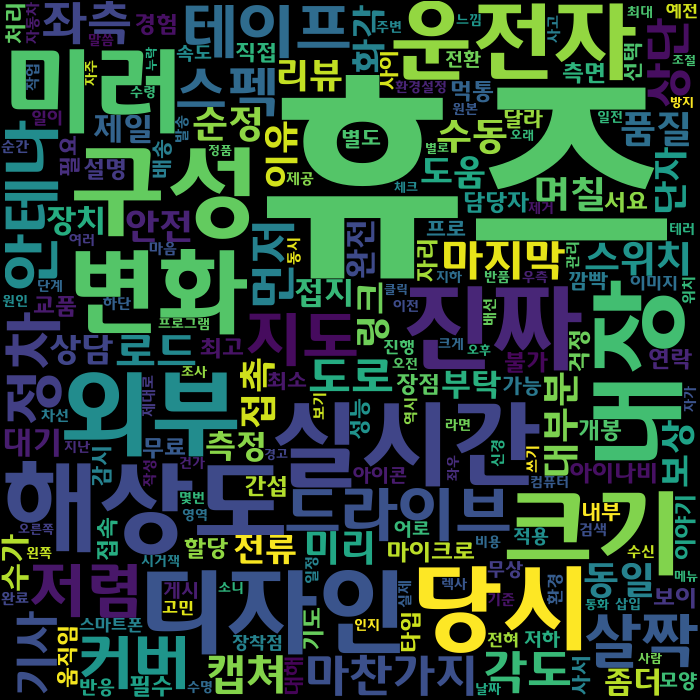

In [488]:
itro_img = Image.open('data/itro.png')
itro_img

In [486]:
def print_img(brand):
    image= Image.open('data/'+brand+'.png')
    image

In [469]:
tfidf_cloud(cnc_cnt , target_words, counters , 'cnc')

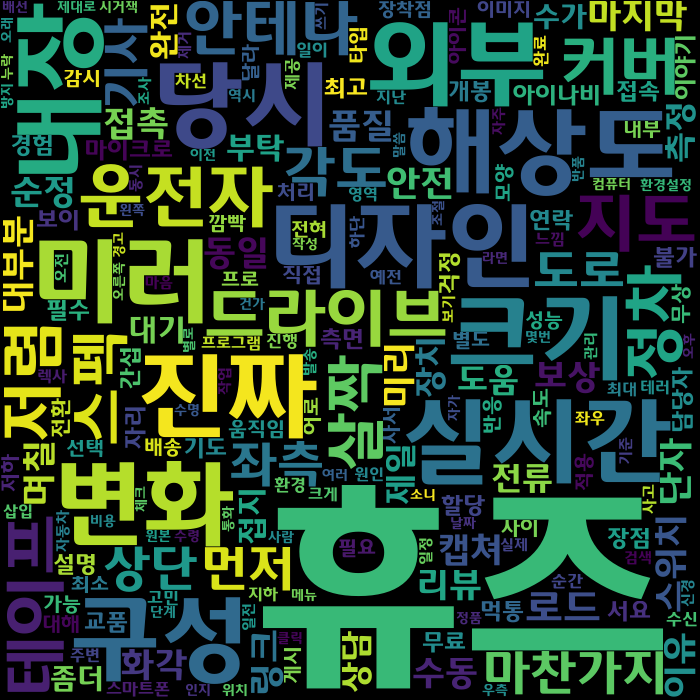

In [490]:
cnc_img = Image.open('data/cnc.png')
cnc_img

In [470]:
tfidf_cloud(qr_cnt , target_words, counters , 'qr')

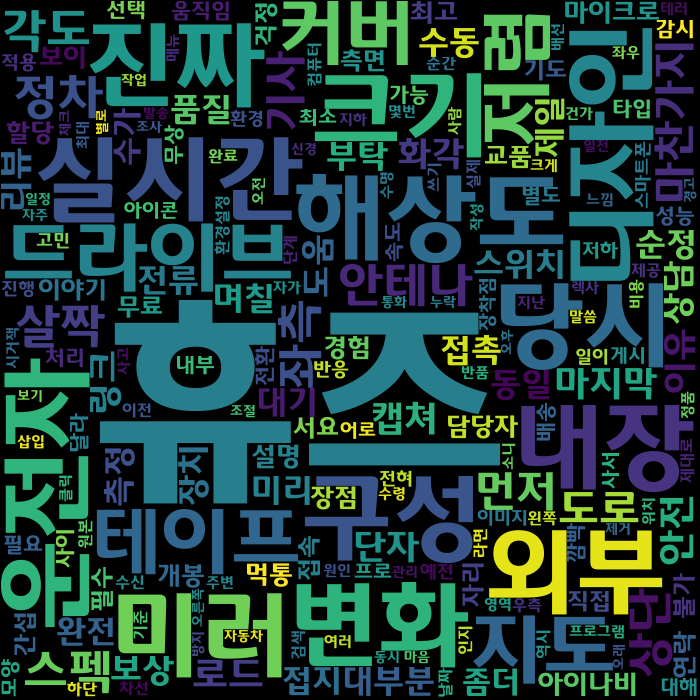

In [491]:
qr_img = Image.open('data/qr.png')
qr_img

In [471]:
tfidf_cloud(inavi_cnt , target_words, counters , 'inavi')

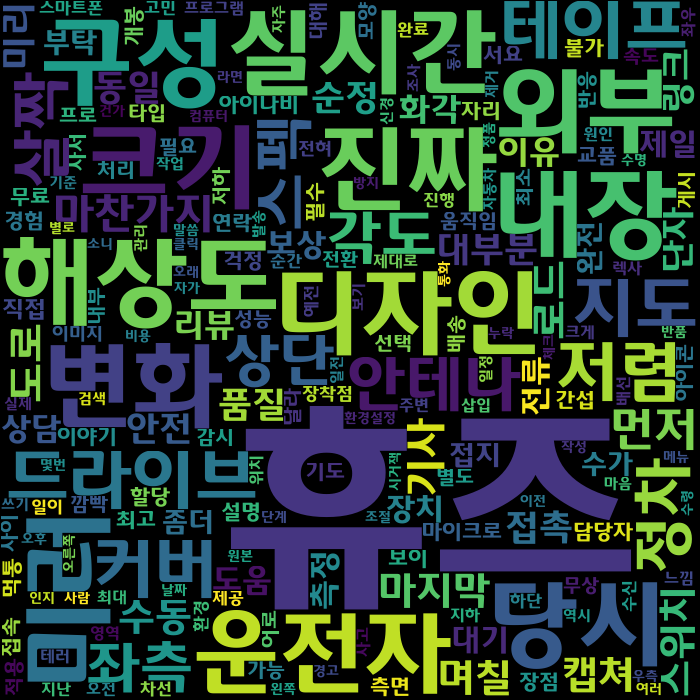

In [492]:
inavi_img = Image.open('data/inavi.png')
inavi_img

In [472]:
tfidf_cloud(fine_cnt , target_words, counters , 'fine')

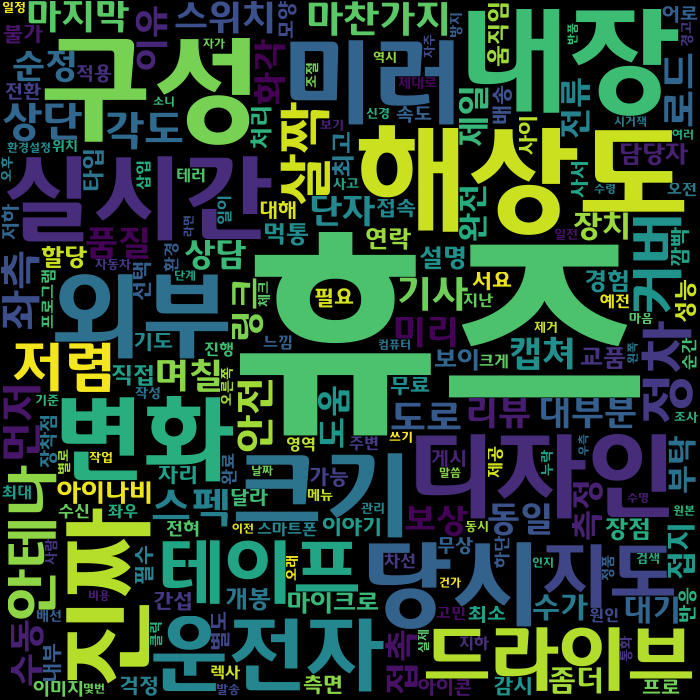

In [493]:
fine_img = Image.open('data/fine.png')
fine_img

## 2. 워드 클라우드 그리기

In [267]:
from wordcloud import WordCloud

In [268]:
font_file = 'resources/Daum_SemiBold.ttf'
WC = WordCloud(font_path=font_file, width=700, height=700)

In [269]:
black_wc = WC.generate(' '.join(itro_))
black_wc.to_file('data/black_itro.png')

In [88]:
print (result[:200])

['체험', '신청', '동체', '신청', '활동', '안내', '가기', '클릭', '체험', '모집', '일정', '조사', '제품', '에코', '엔씨', '유리', '코팅', '네이버', '블랙박스', '동호회', '네이버', '블랙박스', '동호회', '회원', '차량', '블랙박스', '대한', '기본', '지식', '차량', '전문', '견해', '회원', '동호회', '활동', '회원', '차량', '디지털카메라', '캠코더', '소지', '모집', '인원', '모집', '기간', '선정', '발표', '제품', '발송', '체험', '활동', '기간', '우수', '체험', '발표', '예정', '일정', '상황', '변경', '에코', '엔씨', '체험', '신청서', '작성', '클릭', '체험', '임무', '영상', '사진', '첨부', '후기', '수령', '구성', '소개', '디자인', '리뷰', '제품', '사용', '차량', '외관', '리뷰', '주행', '테스트', '운행', '외관', '상태', '변화', '제품', '에피소드', '제품', '총평', '체험', '활동', '장소', '자격', '조건', '디카', '디지털', '캠코더', '소지', '블로그', '운영', '최소', '커뮤니티', '활동', '네이버', '블랙박스', '동호회', '까페', '에코', '엔씨', '유리', '코팅', '체험', '후기', '카테고리', '필수', '후기', '심사', '장소', '네이버', '개인', '블로그', '필수', '최소', '차량', '블랙박스', '자동차', '관련', '싸이트', '동호회', '리뷰', '작성', '블랙박스', '동호회', '로고', '사진', '동영상', '워터마크', '필수', '삽입', '저작권', '문제', '때문', '에코', '엔씨', '체험', '신청서', '작성', '클릭', '우수', '체험', '심사', '방법', '체험', '후기', '내용', '내용', '사진', '동영상

In [89]:
black_wc = WC.generate(' '.join(result[:200]))
black_wc.to_file('data/black2.png')

# 3.불평/불만 네비인사이드

In [240]:
navi = pd.read_csv('data/navi.csv', sep=None)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [242]:
navi.head()

idx    site                               title  \
0   60  네비인사이드      아이로드 3300ch 2채널.. 사용후 탈모증상 생김ㅋ   
1   61  네비인사이드     파인뷰 CR-300HD 기기에 문제가 있는 것 같은데..   
2   62  네비인사이드             아이패스 200HD 100HD 아이트로닉스   
3   63  네비인사이드  정말 이런 회사의 제품이면 그 누구에게도 추천하지 않겠습니다.   
4   64  네비인사이드          불스아이 고객센터 A/S는 정말 엉망이군요...   

                                             content evaluation  
0  디자인/사이즈/성능/사용편의성 : 디자인은 이쁨/사이즈크기 적당함/성능은 아주 떨어...   negative  
1  얼마전에 CR-300HD 블랙 박스가 몇일 녹화 되다가 그 이후로 녹화 영상이 없어...   negative  
2  요즘 1채널 두개로 전 후방으로 많이 다실겁니다.\n그래서 아이트로닉스에서 200H...   negative  
3  밑에 글에 이어 오늘 결국 제가 머리 끝까지 화가 나서 본사로 직접 전화를 걸었습니...   negative  
4  불스아이 ETK-B3500 제품을 사용 중에  야간 저장영상이 너무 심하게 끊겨 도...   negative

In [243]:
_pos(navi)

[('이쁨', 'Adjective'),
 ('적당함', 'Adjective'),
 ('중요한', 'Adjective'),
 ('궁금합', 'Adjective'),
 ('좋', 'Adjective'),
 ('없', 'Adjective'),
 ('똑같', 'Adjective'),
 ('중요한', 'Adjective'),
 ('없', 'Adjective'),
 ('비슷한', 'Adjective'),
 ('엄청나게', 'Adjective'),
 ('좋', 'Adjective'),
 ('입니', 'Adjective'),
 ('있', 'Adjective'),
 ('좋', 'Adjective'),
 ('이래', 'Adjective'),
 ('같은', 'Adjective'),
 ('많고', 'Adjective'),
 ('좋', 'Adjective'),
 ('좋', 'Adjective'),
 ('있는', 'Adjective'),
 ('이런', 'Adjective'),
 ('없고', 'Adjective'),
 ('어떤', 'Adjective'),
 ('어떤', 'Adjective'),
 ('어떤', 'Adjective'),
 ('입니', 'Adjective'),
 ('이런', 'Adjective')]

In [244]:
_pos(black_box2)

[('있거', 'Adjective'),
 ('활발한', 'Adjective'),
 ('있', 'Adjective'),
 ('활발한', 'Adjective'),
 ('부탁드립니', 'Adjective'),
 ('적절한', 'Adjective'),
 ('없는', 'Adjective'),
 ('있', 'Adjective'),
 ('틈틈히', 'Adjective'),
 ('많은', 'Adjective'),
 ('훌륭한', 'Adjective'),
 ('있', 'Adjective'),
 ('같은', 'Adjective'),
 ('없는', 'Adjective')]